# Importing pac

In [81]:
### Data Collection
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import numpy as np
key="f7fee84c9ad6db319bb4e6cd55a797e5ab66561f"

# Getting Tata Motors stock prices from Tiingo

In [82]:
df = pdr.get_data_tiingo('TTM', api_key=key)


In [83]:
df.to_csv('C:/Users/asus/TTM.csv')

In [84]:
df=pd.read_csv('C:/Users/asus/TTM.csv')

In [85]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TTM,2016-04-18 00:00:00+00:00,30.54,30.87,30.44,30.49,1412801,30.529884,30.859774,30.429917,30.479900,1412801,0.0,1.0
1,TTM,2016-04-19 00:00:00+00:00,30.79,31.16,30.61,30.87,1070723,30.779801,31.149678,30.599860,30.859774,1070723,0.0,1.0
2,TTM,2016-04-20 00:00:00+00:00,30.80,31.00,30.59,30.59,929306,30.789798,30.989731,30.579867,30.579867,929306,0.0,1.0
3,TTM,2016-04-21 00:00:00+00:00,30.89,31.00,30.54,31.00,964892,30.879768,30.989731,30.529884,30.989731,964892,0.0,1.0
4,TTM,2016-04-22 00:00:00+00:00,31.30,31.40,30.86,30.86,1132032,31.289632,31.389599,30.849778,30.849778,1132032,0.0,1.0


In [86]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TTM,2021-04-09 00:00:00+00:00,21.24,21.24,20.96,21.06,688764,21.24,21.24,20.96,21.06,688764,0.0,1.0
1254,TTM,2021-04-12 00:00:00+00:00,18.56,19.22,18.56,19.16,3509402,18.56,19.22,18.56,19.16,3509402,0.0,1.0
1255,TTM,2021-04-13 00:00:00+00:00,19.66,20.09,19.58,20.03,2334295,19.66,20.09,19.58,20.03,2334295,0.0,1.0
1256,TTM,2021-04-14 00:00:00+00:00,20.05,20.34,19.89,19.89,1293354,20.05,20.34,19.89,19.89,1293354,0.0,1.0
1257,TTM,2021-04-15 00:00:00+00:00,20.17,20.23,20.03,20.21,775500,20.17,20.23,20.03,20.21,775500,0.0,1.0


In [87]:
df1=df.reset_index()['close']

In [88]:
df1.shape

(1258,)

# Plotting the current stock market graph

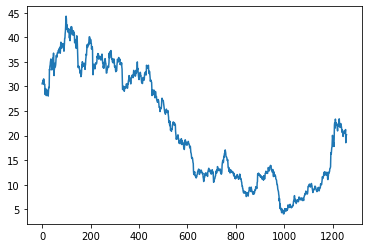

In [89]:
plt.plot(df1)

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [91]:
df1

array([[0.65804526],
       [0.66426262],
       [0.66451132],
       ...,
       [0.3874658 ],
       [0.39716488],
       [0.40014922]])

# Spliting the dataset into train and test 

In [92]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [93]:
training_size,test_size

(817, 441)

# Converting an array of values into a dataset matrix

In [94]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [95]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 100
X_train , y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [96]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [97]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

# Reshaping input to be samples, time steps,features for LSTM

In [98]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the STACKED LSTM model

In [99]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [100]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Training the model for 100 epochs

In [102]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.1436 - val_loss: 0.0255
Epoch 2/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0176 - val_loss: 0.0142
Epoch 3/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0088 - val_loss: 0.0076
Epoch 4/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0057 - val_loss: 0.0060
Epoch 5/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0026 - val_loss: 0.0023
Epoch 6/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0017 - val_loss: 0.0015
Epoch 7/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 8/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0014 - val_loss: 0.0016
Epoch 9/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
716/716 [====

In [116]:
import tensorflow as tf

In [117]:
tf.__version__

'1.14.0'

In [152]:
#check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [153]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics

In [120]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27.17048191267213

In [121]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

12.037956311923937

# Shift train predictions for plotting

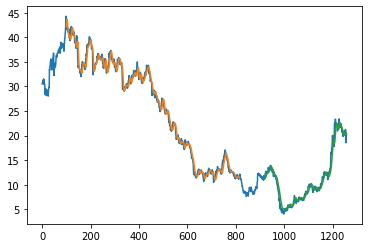

In [122]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [123]:
len(test_data)

441

In [137]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [138]:
x_input=test_data[341:].reshape(1,-1)

In [139]:
x_input.shape

(1, 100)

In [140]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# Prediction for next 10 days

In [141]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.39607465]
101
1 day input [0.17930863 0.18353643 0.1895051  0.19149465 0.20641631 0.19547376
 0.21114151 0.21288237 0.21337976 0.20964934 0.20989804 0.20815717
 0.20641631 0.19671723 0.19995026 0.19671723 0.20542154 0.21114151
 0.20467545 0.20144243 0.17682169 0.17358866 0.18826163 0.19199204
 0.20940065 0.20591893 0.21188759 0.21188759 0.2158667  0.22929619
 0.23029097 0.23302661 0.23849789 0.29395673 0.31012186 0.30315842
 0.31857747 0.33523999 0.33822432 0.36955981 0.39741358 0.38522756
 0.35986073 0.35737379 0.34170604 0.36010943 0.34145735 0.38398408
 0.44988809 0.46107933 0.45336981 0.43422034 0.47973141 0.45560806
 0.45162895 0.45187764 0.46008456 0.45088286 0.45461328 0.44242726
 0.43148471 0.41979607 0.44391942 0.44889331 0.44864462 0.44541159
 0.45983586 0.47923402 0.48097488 0.458095   0.4536185  0.43745337
 0.43919423 0.44342203 0.45734892 0.4449142  0.44292465 0.44093509
 0.42899776 0.41357871 0.42626212 0.41904999 0.41258393 0.39393186
 0.3919423  0.40586919 0.4051231 

8 day output [[0.383141]]
9 day input [0.21337976 0.20964934 0.20989804 0.20815717 0.20641631 0.19671723
 0.19995026 0.19671723 0.20542154 0.21114151 0.20467545 0.20144243
 0.17682169 0.17358866 0.18826163 0.19199204 0.20940065 0.20591893
 0.21188759 0.21188759 0.2158667  0.22929619 0.23029097 0.23302661
 0.23849789 0.29395673 0.31012186 0.30315842 0.31857747 0.33523999
 0.33822432 0.36955981 0.39741358 0.38522756 0.35986073 0.35737379
 0.34170604 0.36010943 0.34145735 0.38398408 0.44988809 0.46107933
 0.45336981 0.43422034 0.47973141 0.45560806 0.45162895 0.45187764
 0.46008456 0.45088286 0.45461328 0.44242726 0.43148471 0.41979607
 0.44391942 0.44889331 0.44864462 0.44541159 0.45983586 0.47923402
 0.48097488 0.458095   0.4536185  0.43745337 0.43919423 0.44342203
 0.45734892 0.4449142  0.44292465 0.44093509 0.42899776 0.41357871
 0.42626212 0.41904999 0.41258393 0.39393186 0.3919423  0.40586919
 0.4051231  0.40885352 0.41556827 0.42153693 0.41904999 0.41681174
 0.40711266 0.41929868 0

16 day output [[0.37517977]]
17 day input [0.20542154 0.21114151 0.20467545 0.20144243 0.17682169 0.17358866
 0.18826163 0.19199204 0.20940065 0.20591893 0.21188759 0.21188759
 0.2158667  0.22929619 0.23029097 0.23302661 0.23849789 0.29395673
 0.31012186 0.30315842 0.31857747 0.33523999 0.33822432 0.36955981
 0.39741358 0.38522756 0.35986073 0.35737379 0.34170604 0.36010943
 0.34145735 0.38398408 0.44988809 0.46107933 0.45336981 0.43422034
 0.47973141 0.45560806 0.45162895 0.45187764 0.46008456 0.45088286
 0.45461328 0.44242726 0.43148471 0.41979607 0.44391942 0.44889331
 0.44864462 0.44541159 0.45983586 0.47923402 0.48097488 0.458095
 0.4536185  0.43745337 0.43919423 0.44342203 0.45734892 0.4449142
 0.44292465 0.44093509 0.42899776 0.41357871 0.42626212 0.41904999
 0.41258393 0.39393186 0.3919423  0.40586919 0.4051231  0.40885352
 0.41556827 0.42153693 0.41904999 0.41681174 0.40711266 0.41929868
 0.42675951 0.36010943 0.3874658  0.39716488 0.40014922 0.39607465
 0.39222771 0.38971007 

24 day output [[0.36697072]]
25 day input [0.20940065 0.20591893 0.21188759 0.21188759 0.2158667  0.22929619
 0.23029097 0.23302661 0.23849789 0.29395673 0.31012186 0.30315842
 0.31857747 0.33523999 0.33822432 0.36955981 0.39741358 0.38522756
 0.35986073 0.35737379 0.34170604 0.36010943 0.34145735 0.38398408
 0.44988809 0.46107933 0.45336981 0.43422034 0.47973141 0.45560806
 0.45162895 0.45187764 0.46008456 0.45088286 0.45461328 0.44242726
 0.43148471 0.41979607 0.44391942 0.44889331 0.44864462 0.44541159
 0.45983586 0.47923402 0.48097488 0.458095   0.4536185  0.43745337
 0.43919423 0.44342203 0.45734892 0.4449142  0.44292465 0.44093509
 0.42899776 0.41357871 0.42626212 0.41904999 0.41258393 0.39393186
 0.3919423  0.40586919 0.4051231  0.40885352 0.41556827 0.42153693
 0.41904999 0.41681174 0.40711266 0.41929868 0.42675951 0.36010943
 0.3874658  0.39716488 0.40014922 0.39607465 0.39222771 0.38971007
 0.38809857 0.38696757 0.38601834 0.3850925  0.38413393 0.38314101
 0.38213119 0.381120

In [143]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [144]:
len(df1)

1258

In [145]:
df3=df1.tolist()
df3.extend(lst_output)

# Prediction for next 10 days on a graph

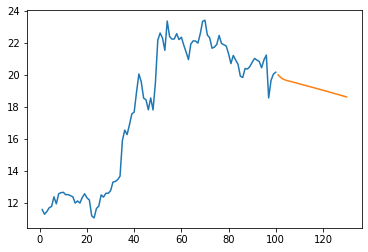

In [150]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# Plotting the final predicted graph for Tata motors 

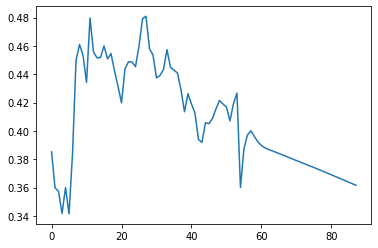

In [151]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])